In [1]:
#####################################################################################################################
#Developed by Jonathan Ojeda 18/2/2021 QAAFI UQ
# Code functionalities:
# Define the cluster number to be used by k-means 
#####################################################################################################################

In [3]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#Extend screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [29]:
data0 = pd.read_csv(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\data\newenv.csv')
data = data0.drop(['Unnamed: 0'], axis=1)
data.head()

,lat,lon,year,rain_a,radn_a,rain_b,radn_b,rain_c,radn_c,tmax_a,tmin_a,tmean_a,tmax_b,tmin_b,tmean_b,tmax_c,tmin_c,tmean_c
0,25.25,-81.25,1995,208.720205,1760.205241,399.064300,1587.924530,378.008811,1360.146956,29.926334,22.338490,26.132412,32.173313,25.614920,28.894117,30.880426,24.612473,27.746450
1,25.25,-80.75,1995,253.500109,1617.158845,439.977989,1463.146197,441.357791,1264.659323,28.913250,22.487806,25.700530,31.289670,25.521042,28.405355,30.040295,24.734158,27.387226
2,25.75,-81.75,1995,195.829374,1778.060071,454.813932,1605.138435,384.780232,1368.051625,29.737240,22.002357,25.869799,32.138035,25.380741,28.759388,30.901396,24.310993,27.606195
3,25.75,-81.25,1995,229.691330,1727.683188,511.249461,1551.324274,415.540824,1332.511129,29.367783,21.371338,25.369560,31.582650,25.156366,28.369509,30.498753,24.329195,27.413973
4,25.75,-80.75,1995,274.451211,1578.892953,513.683174,1411.420895,444.733343,1227.496463,28.752335,21.572224,25.162280,31.465693,25.267406,28.366550,30.382769,24.537518,27.460142


In [30]:
categorical_features = ['lat', 'lon']
continuous_features = ['rain_a', 'radn_a', 'rain_b', 'radn_b', 'rain_c',
       'radn_c', 'tmin_a','tmin_b','tmin_c','tmax_a', 'tmax_b','tmax_c']

In [31]:
data[continuous_features].describe()

,rain_a,radn_a,rain_b,radn_b,rain_c,radn_c,tmin_a,tmin_b,tmin_c,tmax_a,tmax_b,tmax_c
count,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000,1860.000000
mean,213.064034,1402.148304,229.748500,1528.640168,198.236852,1098.397208,10.631483,18.745693,12.775348,23.374891,30.476969,25.086064
std,56.319492,121.818224,69.102795,100.070656,54.191492,125.437241,4.544991,3.346187,4.228895,4.523068,3.204505,4.129020
min,19.077395,1204.612384,79.141111,1361.031751,58.245845,805.028754,0.507991,9.740942,4.694215,12.438239,21.431742,15.428803
25%,178.189279,1312.027659,192.618293,1451.413788,174.562016,1006.983078,6.990826,16.184849,9.419736,19.855177,27.948665,21.944504
50%,219.234803,1373.535865,229.590343,1506.411554,200.887790,1117.411363,10.536563,19.045173,12.539097,23.416288,31.071507,25.650935
75%,257.009936,1469.247264,256.629871,1594.885001,224.294837,1188.374982,14.113443,21.465805,15.973197,27.281080,32.847195,28.677338
max,322.734529,1813.590376,540.639531,1800.523532,444.733343,1384.404329,22.487806,25.632470,24.887293,34.456436,38.009026,33.539005


In [32]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,year,rain_a,radn_a,rain_b,radn_b,rain_c,radn_c,tmax_a,tmin_a,tmean_a,...,lon_-76.75,lon_-76.25,lon_-75.75,lon_-75.25,lon_-74.75,lon_-74.25,lon_-73.75,lon_-73.25,lon_-72.75,lon_-72.25
0,1995,208.720205,1760.205241,399.064300,1587.924530,378.008811,1360.146956,29.926334,22.338490,26.132412,...,0,0,0,0,0,0,0,0,0,0
1,1995,253.500109,1617.158845,439.977989,1463.146197,441.357791,1264.659323,28.913250,22.487806,25.700530,...,0,0,0,0,0,0,0,0,0,0
2,1995,195.829374,1778.060071,454.813932,1605.138435,384.780232,1368.051625,29.737240,22.002357,25.869799,...,0,0,0,0,0,0,0,0,0,0
3,1995,229.691330,1727.683188,511.249461,1551.324274,415.540824,1332.511129,29.367783,21.371338,25.369560,...,0,0,0,0,0,0,0,0,0,0
4,1995,274.451211,1578.892953,513.683174,1411.420895,444.733343,1227.496463,28.752335,21.572224,25.162280,...,0,0,0,0,0,0,0,0,0,0


In [33]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [34]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

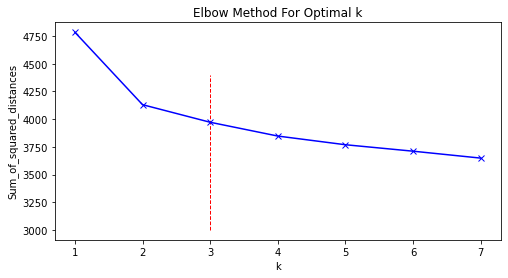

In [36]:
fig = plt.figure(figsize=(8,4))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
ax = plt.gca()
#ax.set_ylim([100000,150000])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.plot([3,3],[3000,4400],"--",color="red", linewidth=1,zorder=1)
#plt.savefig(r'C:\Users\uqjojeda\Nextcloud\PURTERRA-A0131\2020\paper\figs\kmeans.png', dpi=300,bbox_inches='tight')